In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def tag_combo_freq(tags):
    
    freq = df['tags'].value_counts()
    
    return sorted(zip(list(freq.index) ,list(freq.values)), key = lambda x:-x[1])

def tag_freq(tags):
    
    indiv_tf = {}

    for tag in tags:

        for t in tag:

            if t in indiv_tf:
                indiv_tf[t] +=1
            else:
                indiv_tf[t]=1
                
    
    tf = sorted(list(indiv_tf.items()) ,key = lambda x:-x[1])
    
    return tf
    
def word_freq(lyrics,n):
    
    vect = CountVectorizer(max_features=n,stop_words='english')
    
    bag = vect.fit_transform(lyrics).toarray()
    
    freq = list(bag.sum(axis=0))

    word_freq = [ (word,f) for word,f in zip( list(vect.vocabulary_.keys()) , freq ) ]
    
    word_freq = sorted(word_freq, key= lambda x: -x[1])
    
    return word_freq

def word_freq2(lyrics,n):

    vect = CountVectorizer(max_features=n,stop_words='english')
    vect.fit(lyrics)
    return list(vect.vocabulary_.keys())

def cum_sum(tags):

    sums =[]
    
    for i,a in enumerate(tags):
        
        if i==0:
            sums.append(tags[0][1])
        else:
            sums.append(tags[i][1] + sums[i-1])
    
    return sums


def clean_tags(raw):
    
    
    if raw =='':
        return []
    
    tags= raw[1:-2].split("]")
    tags = [ tag.split("'")[1] for tag in tags]
    return tags



In [2]:
df= pd.read_csv('lyric_data.csv',index_col=0)

bad_song = df['lyrics'].value_counts().index[0]
df[df['lyrics'] == bad_song] = ''
df.fillna('',inplace=True)


    

In [15]:
df['lyrics'][df['lyrics'] != ''].unique().shape

(152563,)

In [4]:
vect = CountVectorizer(stop_words='english')
vect.fit(df['lyrics'][df['lyrics'] != ''])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
tokens = [tok(l) for l in df['lyrics'][df['lyrics'] != '']]
wf = tag_freq(tokens)


In [10]:
w_cdf = cum_sum(wf)
w_cdf = [ x /w_cdf[-1] for x in w_cdf ]

In [23]:
len(w_cdf)

171180

In [22]:
a = 20000
print(wf[a])
print(w_cdf[a])

('mara', 34)
0.9646903101753528


In [43]:
most_popular = tag_combo_freq(df['tags'])[1:30]

for tag in most_popular:
    
    tag_mask = df[df['tags'] == tag[0]]

    #tag_lyrics = lyrics_df['lyrics'][tag_mask]    
    
    
    print(tag)
    print(word_freq2(tag_mask['lyrics'],10))
    print()


("[['rock', '100']]", 1793)
['just', 'got', 'll', 'time', 'love', 'oh', 'don', 've', 'know', 'like']

("[['blues', '100']]", 1178)
['oh', 'just', 'got', 'don', 'll', 'love', 'know', 'time', 'like', 'baby']

("[['country', '100']]", 1128)
['just', 'got', 'll', 'time', 'don', 've', 'love', 'know', 'like', 'heart']

("[['jazz', '100']]", 1101)
['know', 'just', 'baby', 'got', 'don', 've', 'oh', 'like', 'love', 'floy']

("[['pop', '100']]", 1008)
['just', 'll', 'time', 'way', 'oh', 'love', 'don', 've', 'know', 'like']

("[['title is a full sentence', '100']]", 926)
['gotta', 'just', 'say', 'don', 'll', 'heart', 'love', 'know', 'makes', 'everybody']

("[['reggae', '100']]", 885)
['just', 'say', 'don', 'let', 'jah', 'love', 'know', 'man', 'yuh', 'oh']

("[['trance', '100']]", 584)
['know', 'll', 'save', 'just', 'wanna', 'yeah', 'don', 'oh', 'love', 'face']

("[['indie', '100']]", 575)
['just', 'got', 'don', 've', 'll', 'love', 'know', 'time', 'like', 'oh']

("[['electronic', '100']]", 555)
['

In [3]:
tcf = tag_combo_freq(df['tags'])
tags= [ clean_tags(raw) for raw in list(df['tags'])]
tf = tag_freq(tags)

In [13]:
tag_combo_cdf = cum_sum(tcf)
tag_cdf = cum_sum(tf)

print(tag_cdf[5000])
tag_combo_cdf = [ x / tag_combo_cdf[-1] for x in tag_combo_cdf]
tag_cdf = [ x / tag_cdf[-1] for x in tag_cdf]

4553435


In [7]:
len(tf)
#for t in tf[-1000:]:
#    print(t)

475080

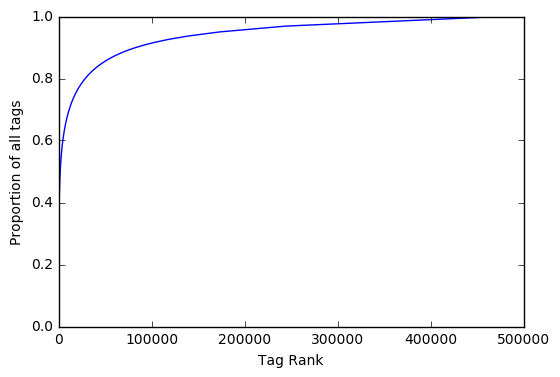

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('')
plt.ylabel('Proportion of all tags')
plt.xlabel('Tag Rank')
plt.plot(tag_cdf)
#plt.plot(tag_combo_cdf)
plt.show()

16.713277945


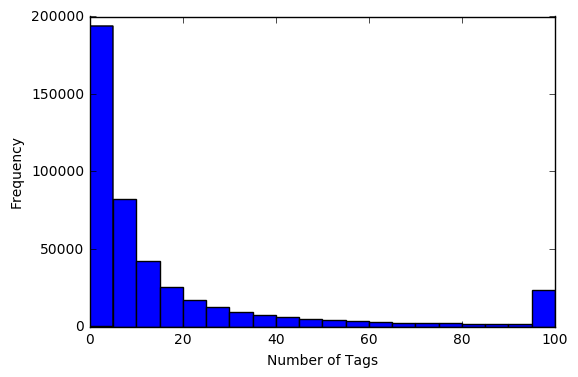

In [26]:
import numpy as np
l = [len(x) for x in tags]
print(np.array(l).mean())

plt.hist(np.array(l),bins=20)
plt.ylabel('Frequency')
plt.xlabel('Number of Tags')
plt.show()

In [26]:


def tag2index(tags,tag_map):
    
    indices = []
    
    for tag in tags:

        x = []
        for e in tag:
            
            if e in tag_map:
                
                x.append(tag_map[e])
                
        indices.append(x)
    return indices
            

#tags= [ clean_tags(raw) for raw in list(df['tags'])]

important_tags = [x[0] for x in tf[0:1000]]
important_tags = dict(zip(important_tags,range(len(important_tags))))

indices = tag2index( tags , important_tags)

In [29]:
for i in range(5):
    print(tags[i],indices[i])

['alternative rock', 'rock', 'hard rock', 'heavy metal', '00s', '5', 'check this out', 'cryb test 4', 'adelitas way scream'] [10, 0, 30, 52, 9, 458]
['Bay Area', 'hieroglyiphics', 'classic', 'Hip-Hop', 'stream', 'OG', '1979-2006: A Hip-Hop Odyssey - 800 Tracks In A 48 Minute Mix', 'heiroglyphics', 'oaksterdamn', 'heard on Pandora'] [68, 42, 310, 83]
['60s', 'soul', 'pop', 'rock', 'male vocalists', 'oldies', '1969', 'close harmony', '1960s', 'sixties', 'beautiful', 'Love', 's", ', 's", ', 'jukebox heaven', '60s Gold', 'GH10', 'perwinger', 'the box tops - soul deep', 'Radiotsar approved', 'classic rock', 'soul deep', 'The Box Tops'] [55, 20, 1, 0, 14, 31, 314, 302, 519, 11, 7, 67, 67, 673, 398, 291, 16]
['rock', 'classic rock', 'psychedelic', 'blues rock', '60s'] [0, 16, 73, 106, 55]
['latin'] [108]


In [23]:
important_tags

{'male vocalists': 14,
 'Awesome Guitar Jams': 477,
 'underground': 622,
 '80s rock': 555,
 'synthpop': 137,
 'rockin': 325,
 '1950s': 629,
 'moody': 336,
 'industrial metal': 342,
 'sweet': 115,
 'reggae': 79,
 'progressive death metal': 869,
 'dance': 8,
 'punk rock': 59,
 'r&b': 173,
 'ethereal': 220,
 '3': 667,
 'f': 484,
 'indietronica': 279,
 'Metro Jazz': 797,
 'Torquemada': 429,
 'depressing': 560,
 '70s': 43,
 'acoustic': 37,
 'indie pop': 57,
 'rhythum and blues tag': 711,
 'r and b': 253,
 'indie rock': 19,
 'Technical Death Metal': 493,
 'genius': 263,
 'Calming': 765,
 'favorites': 6,
 'sex': 246,
 'folk': 24,
 '-favorites-': 888,
 'drone': 804,
 'favourite artists': 782,
 'Bittersweet': 329,
 'Smooth Jazz': 150,
 '60s': 55,
 'Energetic': 141,
 '1980': 952,
 'blingtacular': 679,
 'feel good': 175,
 'dark electro': 644,
 'minimal': 197,
 'best songs of the 80s': 678,
 'death': 466,
 'IIIIIIIIII AMAZING TRACK :D IIIIIIIIII': 698,
 'chick rock': 874,
 'good song': 382,
 'Slud

In [32]:
X = df[df['lyrics'] != '']

In [85]:
#clean the tag strings
tags  = [ clean_tags(raw) for raw in list(X['tags'])]

#get the frequency of each tag
tf = tag_freq(tags)

#select the n most frequent tags
important_tags = [x[0] for x in tf[0:1000]]
important_tags = dict(zip(important_tags,range(len(important_tags))))

#map to indices for training
tag_indices = tag2index( tags , important_tags)

y = np.zeros((len(tag_indices),1000))

for i,tags in enumerate(tag_indices):
    for tag in tags:
        y[i,tag] = 1


In [86]:
print(y[0],tag_indices[0])

[ 1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [48]:
#bag of words features from lyrics
n = 10000
vect = CountVectorizer(max_features=n,stop_words='english')
vect.fit(X['lyrics'])
vocab= vect.vocabulary_
tok =vect.build_analyzer()


In [67]:
def sent2seq(text,key,tok,l):
    
    words = tok(text)

    unknown = len(key.keys()) +2
    
    seq = []
    for word in words:
        if word in key:
            seq.append(key[word] + 1)
        else:
            seq.append(unknown)
                
    if len(seq) > l:
        return seq[:l]
    else:
        padding = [0 for i in range(l-len(seq))]
        
        return(padding+seq)
    
    return seq

print(sent2seq(X['lyrics'][0] , vocab,tok,100))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5000, 3579, 9410, 3741, 7020, 1164, 5413, 2569, 4787, 172, 5057, 4988, 6127, 3715, 2569, 4787, 9580, 3110, 1713, 2569, 7799, 9580, 5251, 1517, 5251, 7496, 5057, 4989, 1501, 3043, 1976, 4684, 7496, 3171, 4457, 4958, 4028, 9507, 5251, 5139, 8949, 6019, 5492, 8790, 2880, 9580, 2569, 4787, 7496, 838, 3715, 2569, 4787, 1280, 9580, 3110, 1713, 2569, 7799, 9580, 5251, 1517, 7496, 5358, 2305, 4741, 3050, 1040, 7825, 7496, 4958, 528, 1517, 5358, 2305, 5251, 7496, 3050, 7496, 1040, 7825, 5251, 7496, 4958, 528]


In [69]:
import time
start = time.time()
features = X['lyrics'].apply(lambda x :sent2seq(x , vocab,tok,100))
print(time.time() - start)

51.51453495025635


In [ ]:
#FIND AVERGAG WORD LENGTH

#vect = CountVectorizer(max_features=n,stop_words='english')
lyrics = df['lyrics'][df['lyrics'] !='']
print(word_freq2(lyrics,10))

lengths = [len(s.split(' ')) for s in  df['lyrics']]
lengths = np.array(lengths)

print(lengths.mean())


plt.hist(np.array(lengths),bins=30)
plt.ylabel('Frequency')
plt.xlabel('Number of Words')
plt.show()